<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-2---define-the-descriptive-statistical-model" data-toc-modified-id="Step-2---define-the-descriptive-statistical-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Step 2 - define the descriptive statistical model</a></span><ul class="toc-item"><li><span><a href="#\begin{align*}--
\mu_\theta-&amp;\sim-Normal(0,-\sigma_\theta)-
\\-\mu_\beta-&amp;\sim-Normal(0,-\sigma_\beta)-
\\-\sigma_\theta-&amp;\sim-Normal(0,-b_{\sigma\theta})-
\\-\sigma_\beta-&amp;\sim-Normal(0,-b_{\sigma\beta})-
\\-\rho-&amp;\sim-LKJ(1)-
\\-\eta_i-&amp;\sim-MVN\bigg((\mu_\theta,-\mu_\beta),-\begin{bmatrix}-\sigma_\theta^2-&amp;\rho\sigma_\theta\sigma_\beta-
\\-\rho\sigma_\theta\sigma_\beta-&amp;-\sigma_\beta^2-
\\-\end{bmatrix}\bigg)-
\\-\hat{\theta_i}-&amp;\sim-Normal(\eta_{1i,-\sigma_{\epsilon\theta-i}})-
\\-\hat{\beta_i}-&amp;\sim-Normal(\eta_{2i,-\sigma_{\epsilon\beta-i}})
\end{align*}" data-toc-modified-id="\begin{align*}--
\mu_\theta-&amp;\sim-Normal(0,-\sigma_\theta)-
\\-\mu_\beta-&amp;\sim-Normal(0,-\sigma_\beta)-
\\-\sigma_\theta-&amp;\sim-Normal(0,-b_{\sigma\theta})-
\\-\sigma_\beta-&amp;\sim-Normal(0,-b_{\sigma\beta})-
\\-\rho-&amp;\sim-LKJ(1)-
\\-\eta_i-&amp;\sim-MVN\bigg((\mu_\theta,-\mu_\beta),-\begin{bmatrix}-\sigma_\theta^2-&amp;\rho\sigma_\theta\sigma_\beta-
\\-\rho\sigma_\theta\sigma_\beta-&amp;-\sigma_\beta^2-
\\-\end{bmatrix}\bigg)-
\\-\hat{\theta_i}-&amp;\sim-Normal(\eta_{1i,-\sigma_{\epsilon\theta-i}})-
\\-\hat{\beta_i}-&amp;\sim-Normal(\eta_{2i,-\sigma_{\epsilon\beta-i}})
\end{align*}-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><script type="math/tex; mode=display" id="MathJax-Element-147">\begin{align*}  
\mu_\theta &\sim Normal(0, \sigma_\theta) 
\\ \mu_\beta &\sim Normal(0, \sigma_\beta) 
\\ \sigma_\theta &\sim Normal(0, b_{\sigma\theta}) 
\\ \sigma_\beta &\sim Normal(0, b_{\sigma\beta}) 
\\ \rho &\sim LKJ(1) 
\\ \eta_i &\sim MVN\bigg((\mu_\theta, \mu_\beta), \begin{bmatrix} \sigma_\theta^2 &\rho\sigma_\theta\sigma_\beta 
\\ \rho\sigma_\theta\sigma_\beta & \sigma_\beta^2 
\\ \end{bmatrix}\bigg) 
\\ \hat{\theta_i} &\sim Normal(\eta_{1i, \sigma_{\epsilon\theta i}}) 
\\ \hat{\beta_i} &\sim Normal(\eta_{2i, \sigma_{\epsilon\beta i}})
\end{align*}</script></a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Import analysis packages

In [68]:
import stan as ps
import numpy as np
import os
import pandas as pd
from patsy import dmatrix
import arviz as az
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Importing nest_asyncio is only necessary to run pystan in Jupyter Notebooks.
import nest_asyncio
nest_asyncio.apply()

# Measurement error models

# Import the data

The following data below is the example data distrbuted for the Matske et al (2017) from this Open science foundation https://osf.io/mvz29/

In [2]:
# Import data from directory exported from RData file from origninal Win BUGS example
os.chdir("/home/users/bu807041/Desktop")

df1 = pd.read_csv("observed.csv")
df2 = pd.read_csv("epsilon.csv")

y = np.asarray(dmatrix("0 + theta + beta", data = df1) )
epsilon = np.asarray(dmatrix("0 + theta_epsilon + beta_epsilon", data = df2) )

# Step 2 - define the descriptive statistical model  


## \begin{align*}  
\mu_\theta &\sim Normal(0, \sigma_\theta) 
\\ \mu_\beta &\sim Normal(0, \sigma_\beta) 
\\ \sigma_\theta &\sim Normal(0, b_{\sigma\theta}) 
\\ \sigma_\beta &\sim Normal(0, b_{\sigma\beta}) 
\\ \rho &\sim LKJ(1) 
\\ \eta_i &\sim MVN\bigg((\mu_\theta, \mu_\beta), \begin{bmatrix} \sigma_\theta^2 &\rho\sigma_\theta\sigma_\beta 
\\ \rho\sigma_\theta\sigma_\beta & \sigma_\beta^2 
\\ \end{bmatrix}\bigg) 
\\ \hat{\theta_i} &\sim Normal(\eta_{1i, \sigma_{\epsilon\theta i}}) 
\\ \hat{\beta_i} &\sim Normal(\eta_{2i, \sigma_{\epsilon\beta i}})
\end{align*}

Lets break down this hierchial model for correltion estimation in  the presence of measurment error for as described Matske et al.(2017) with the generla methods that origninally proposed by Behesta et al (2009). The model can be genrally broken down into two levels. The first of which is the level of the observed data which it he formulation above are $            (\hat{\theta_i}, \hat{\beta_i} )$ with the corresponding observe error $\sigma_{\epsilon\beta i}, \sigma_{\epsilon\beta i}$ for each observation $ i,$ $i = 1...N$

$\sigma_{\epsilon\beta i}, \sigma_{\epsilon\beta i}$ can be either assumed known or estimated from data. Of note this model does not assume homogeneity of variance, because each observation $i$ has it own associated error.

The second level is the level of all the inferfered varibles (parameters) of the model. for each observation $i$ a $\eta$ is estimated with $\eta = (\theta_i, \beta_i)$ whicha re the infered true values once error is accounted for in the model. $\rho$ is the correlation parameter between $(\theta, \beta)$ when measument error has been modelled. $(\mu_{\theta}, \mu_{\beta}, \sigma_{\theta}, \sigma_{\beta}, \rho)$ are estimated from the data and thus have priors associated with them. This where the model use here diverges from  the WinBugs implementation from Matske et al. (2007). Wihtin this implemetation or the parameter have given weaklyinformative prior values using normal disributions, wheras the Matske etal implemtation suggested very broad priors and to use uniform distributions on the $\sigma$. Final difference is with the $\rho$ prior. orignally a uniform(-1,1) is suggested following Jeffrey (1961), but Stan implemetns LKJ priors which can have same effect as uniform(-1,1) if the set to value of 1.

In [94]:
data = {'n': len(y),
'J': 2,
'y': y,
'epsilon': epsilon,
'sigma_sigma_theta': 5,
'sigma_sigma_beta': 5,
'sigma_mu_theta': 5,
'sigma_mu_beta': 5,
'cor_val': 1}

In [101]:
hier = """
data {
// Stan ver of "Bayesian Inference for Correlations in the Presence of Measurement Error and Estimation Uncertainty"
// WinBugs model

int<lower = 1> n; // Number of observations
int<lower = 1> J; // Number of groups

// Wide format data array containing 
// theta and beta observed values
vector[J] y[n];
vector[J] epsilon[n];

// Prior values must be integer as that is how ther sepcified in python
// to use real number these would need changing
int sigma_mu_theta;
int sigma_mu_beta;
int sigma_sigma_theta;
int sigma_sigma_beta;
int cor_val;
}
parameters {
  vector[J] mu;
  vector<lower = 0>[J] sigma;   
  vector[J] z[n];
  cholesky_factor_corr[J] rho;
}

transformed parameters {

 vector[J] eta[n];
 matrix[J, J] L = diag_pre_multiply(sigma, rho);
 for (i in 1:n){
  eta[i] = mu + L * z[i];
    }
}

model{

//Priors
// Hyperpriors
mu ~ normal(0, sigma_mu_theta);

sigma ~ normal(0, sigma_sigma_theta);


rho ~ lkj_corr_cholesky(cor_val);

for(i in 1:n) {
    z[i] ~ std_normal();
  }

// likelihood
for (i in 1:n){
        y[i,] ~ normal(eta[i,], epsilon[i, ]);  
    }
}

generated quantities {

  corr_matrix[J] rho_u = rho * rho';
  
}
"""

In [102]:
sm1 = ps.build(hier, data=data, random_seed=1)

Building...



Building: 61.3s, done.

In [103]:
%%capture
# Using hmc_nuts_diag_e_adapt to sample the model whilst specfing 
#the step size of sampler to .95 to remove the divergent transitions.
fit = sm1.hmc_nuts_diag_e_adapt(num_chains=4, stepsize = .95)
fit_df = fit.to_frame()
output = az.summary(fit)

In [56]:
output

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu[0],1.069,0.086,0.903,1.224,0.002,0.002,1380.0,1382.0,1.00
mu[1],5.031,0.359,4.336,5.670,0.009,0.006,1707.0,2068.0,1.00
sigma[0],0.582,0.073,0.448,0.716,0.002,0.001,1767.0,2853.0,1.00
sigma[1],2.826,0.282,2.314,3.365,0.006,0.004,2170.0,3136.0,1.00
"z[0,0]",-0.399,0.463,-1.321,0.426,0.006,0.006,5233.0,3138.0,1.00
...,...,...,...,...,...,...,...,...,...
"L[1,1]",1.176,0.409,0.401,1.954,0.015,0.010,775.0,1490.0,1.01
"rho_u[0,0]",1.000,0.000,1.000,1.000,0.000,0.000,4000.0,4000.0,NaN
"rho_u[0,1]",0.892,0.077,0.755,0.999,0.003,0.002,772.0,1494.0,1.01
"rho_u[1,0]",0.892,0.077,0.755,0.999,0.003,0.002,772.0,1494.0,1.01


In [104]:
output

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu[0],1.072,0.085,0.908,1.228,0.002,0.002,1347.0,1875.0,1.00
mu[1],5.046,0.346,4.395,5.705,0.008,0.006,1785.0,2552.0,1.00
sigma[0],0.583,0.074,0.445,0.721,0.002,0.001,1615.0,2276.0,1.00
sigma[1],2.823,0.290,2.307,3.373,0.007,0.005,1484.0,2515.0,1.00
"z[0,0]",-0.389,0.464,-1.270,0.471,0.007,0.006,4617.0,3063.0,1.00
...,...,...,...,...,...,...,...,...,...
"L[1,1]",1.174,0.411,0.334,1.874,0.016,0.011,651.0,1248.0,1.01
"rho_u[0,0]",1.000,0.000,1.000,1.000,0.000,0.000,4000.0,4000.0,NaN
"rho_u[0,1]",0.893,0.077,0.758,1.000,0.003,0.002,668.0,1230.0,1.00
"rho_u[1,0]",0.893,0.077,0.758,1.000,0.003,0.002,668.0,1230.0,1.00


# Posterior checks

## Traceplots

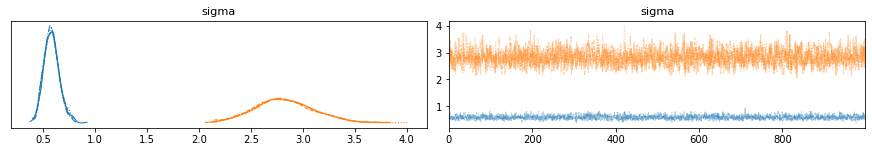

In [42]:
az.plot_trace(fit, var_names=['sigma']);

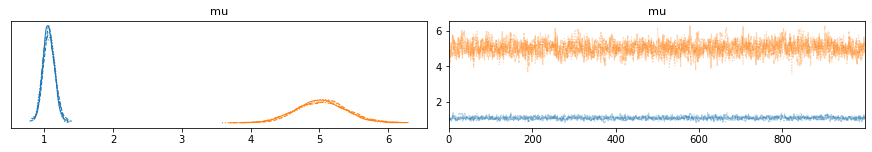

In [43]:
az.plot_trace(fit, var_names=['mu']);

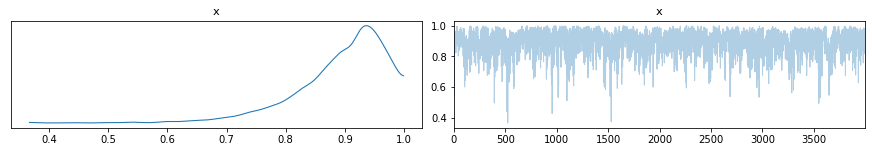

In [76]:
az.plot_trace(fit['rho_u'][0,1]);

# Posteriors

No systematic pathologies with MCMC chains and generally follow a "Fuzzy caterpillar".

In [33]:
etal1 = []
etal2 = []
for i in np.arange(len(df1)):
    eta1 = np.mean(fit['eta'][i,0])
    eta2 = np.mean(fit['eta'][i,1])
    etal1.append(eta1)
    etal2.append(eta2)

# Shrinkage

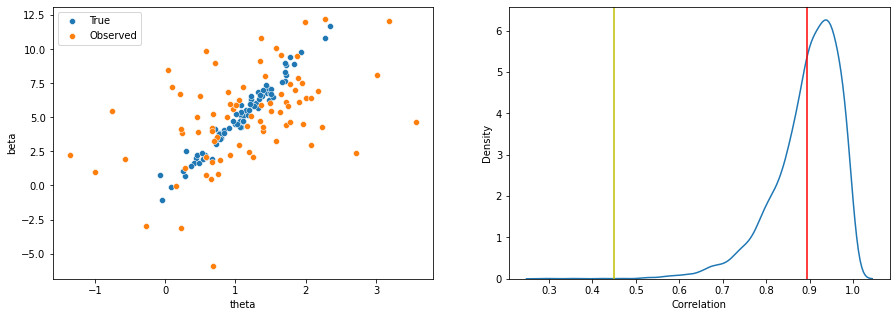

In [160]:
# Scatterplot showing the shrinkage effect from observed to infered true estimates
# after estiamting the correltion whilst accouting for the measurment errors of observed 
#values

# x coordiantes for vertical lines
xcoords = [pearsonr(df1['theta'], df1['beta'])[0], np.mean(fit['rho_u'][0,1])]
col = ('y', 'r')
legend = ['True', 'Observed']

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(ax= ax1,x = etal1, y = etal2);
sns.scatterplot(ax= ax1,x = df1['theta'], y = df1['beta']);
ax1.legend(['True', 'Observed'])

sns.kdeplot(fit['rho_u'][0,1], ax= ax2);
plt.xlabel('Correlation')

# for i in range(2):
plt.axvline(xcoords[0],color= col[0]);
plt.axvline(xcoords[1], color= col[1]);

# References

Behseta, S., Berdyyeva, T., Olson, C. R., & Kass, R. E. (2009). Bayesian correction for attenuation of correlation in multi-trial spike count data. Journal of neurophysiology, 101(4), 2186-2193.

Matzke, D., Ly, A., Selker, R., Weeda, W. D., Scheibehenne, B., Lee, M. D., ... & Bouwmeester, S. (2017). Bayesian inference for correlations in the presence of measurement error and estimation uncertainty. Collabra: Psychology, 3(1).